>[About The Data](#scrollTo=7s8ZH6Vq1M30)

>[Imports & Setup](#scrollTo=JjgNWJIm1_JC)

>[Data Processing](#scrollTo=_qDkuu5637NM)

>>[3.1 Load Data](#scrollTo=luLtWHZ-4LEL)

>>[3.2 Split data into train, test, valid](#scrollTo=0RJmN2IJ4hew)

>>[3.3 Data preprocessing](#scrollTo=f_YhS8Oz4uy8)

>>[3.4 Visualizing samples from data](#scrollTo=6GDOWXmV45q_)

>[Building CNN Model](#scrollTo=hHy8bJgB41Nq)

>[Training](#scrollTo=Wu-SS_yi5Vzk)

>[Visualize model performance](#scrollTo=r6By3cZ75exr)

>[Testing and Evaluation](#scrollTo=VvLOk8Kg5tLu)

>>[7.1 Evaluate](#scrollTo=3tI-Vtl855ht)

>>[7.2 Testing](#scrollTo=OIgrD_p56Fsu)

>[Previous saved model](#scrollTo=iieIjRzUvKxJ)



#1. About The Data

Ekush is the largest dataset of handwritten Bangla characters for research on handwritten Bangla character recognition. The Ekush dataset is a multipurpose comprehensive collection of Bangla Handwritten Characters, encompassing Bangla modifiers, vowels, consonants, compound letters, and numerical digits. It comprises a total of 367,018 isolated handwritten characters contributed by 3,086 unique writers from Bangladesh.

For our study, we specifically focused on a subset of this dataset consisting of numerical digits ranging from 0 to 9. This subset comprised a total of 30,687 images, each corresponding to a single digit.


#2. Imports & Setup




In [ ]:
!pip install split-folders

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
import zipfile
import splitfolders
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
#---------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
#---------------------------------------
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#---------------------------------------
import warnings
warnings.filterwarnings("ignore")

#3. Data Processing

## 3.1 Load Data

In [ ]:
zip_file_path = '/content/drive/MyDrive/Colab Notebooks/digit_21.zip'
destination_folder = '/content'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_folder)
print("Extraction completed.")

Extraction completed.


In [ ]:
import splitfolders

input_folder = '/content/digit_21'
output_folder = '/content/split_dataset'
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(0.8, 0.2), group_prefix=None)

print("Dataset split completed.")

Copying files: 30687 files [00:04, 6918.92 files/s]

Dataset split completed.


In [ ]:
def train_df(tr_path):
    classes, class_paths = zip(*[(label, os.path.join(tr_path, label, image))
                                 for label in os.listdir(tr_path) if os.path.isdir(os.path.join(tr_path, label))
                                 for image in os.listdir(os.path.join(tr_path, label))])

    tr_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return tr_df

In [ ]:
def test_df(ts_path):
    classes, class_paths = zip(*[(label, os.path.join(ts_path, label, image))
                                 for label in os.listdir(ts_path) if os.path.isdir(os.path.join(ts_path, label))
                                 for image in os.listdir(os.path.join(ts_path, label))])

    ts_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return ts_df

In [ ]:
tr_df = train_df('/content/split_dataset/train')
tr_df

,Class Path,Class
0,/content/split_dataset/train/0/1_MAD_15_1_1225...,0
1,/content/split_dataset/train/0/1_DHA_15_1_996.jpg,0
2,/content/split_dataset/train/0/0_CTG_12_1_583.jpg,0
3,/content/split_dataset/train/0/0_DHA_16_1_929.jpg,0
4,/content/split_dataset/train/0/1_DHA_11_1_697.jpg,0
...,...,...
24541,/content/split_dataset/train/8/1_BAR_12_1_410.jpg,8
24542,/content/split_dataset/train/8/1_PABNA_13_1_14...,8
24543,/content/split_dataset/train/8/1_RAJ_12_1_1459...,8
24544,/content/split_dataset/train/8/1_RANG_12_1_295...,8


In [ ]:
ts_df = test_df('/content/split_dataset/val')
ts_df

,Class Path,Class
0,/content/split_dataset/val/0/1_COX_11_1_140.jpg,0
1,/content/split_dataset/val/0/1_GOP_13_1_218.jpg,0
2,/content/split_dataset/val/0/0_MUN_15_1_1251.jpg,0
3,/content/split_dataset/val/0/1_COM_13_1_139.jpg,0
4,/content/split_dataset/val/0/1_DHA_15_1_984.jpg,0
...,...,...
6136,/content/split_dataset/val/8/1_Mad_21_3_00053.jpg,8
6137,/content/split_dataset/val/8/1_DHA_12_1_834.jpg,8
6138,/content/split_dataset/val/8/0_DHA_12_1_716.jpg,8
6139,/content/split_dataset/val/8/0_RAJ_19_3_286.jpg,8


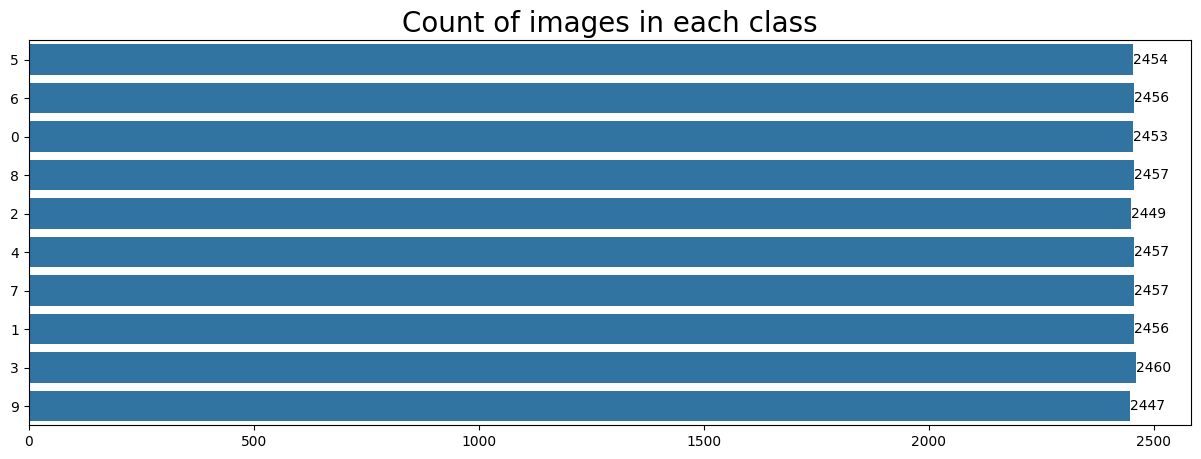

In [ ]:
# Count of images in each class in train data
plt.figure(figsize=(15,5))
ax = sns.countplot(data=tr_df , y=tr_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

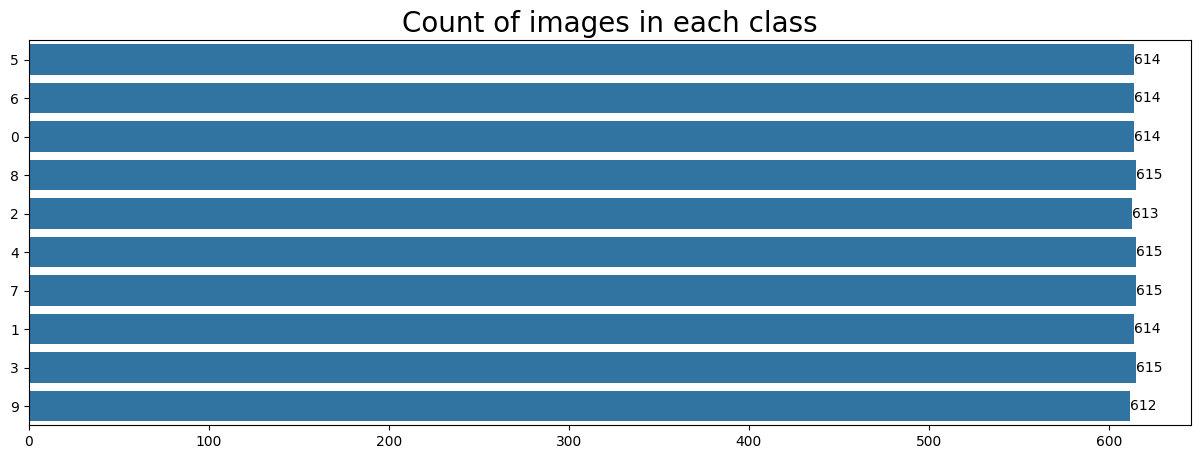

In [ ]:
#Count each class in test data
plt.figure(figsize=(15,5))
ax = sns.countplot(data=ts_df , y=ts_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

##3.2 Split data into train, test, valid

In [ ]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, random_state=20, stratify=ts_df['Class'])
valid_df

,Class Path,Class
2884,/content/split_dataset/val/7/0_NOA_15_1_1342.jpg,7
5692,/content/split_dataset/val/8/0_NOA_16_1_1345.jpg,8
1874,/content/split_dataset/val/9/0_DHA_22_3_117.jpg,9
6069,/content/split_dataset/val/8/1_BHOLA_13_1_107.jpg,8
891,/content/split_dataset/val/5/1_DHA_11_1_644.jpg,5
...,...,...
871,/content/split_dataset/val/5/0_DHA_20_3_91.jpg,5
2237,/content/split_dataset/val/9/1_B.BARIA_12_1_32...,9
5842,/content/split_dataset/val/8/0_FARID_16_1_1056...,8
1464,/content/split_dataset/val/4/0_DHA_17_2_986.jpg,4


##3.3 Data preprocessing

In [ ]:
batch_size = 32
img_size = (71, 71)

_gen = ImageDataGenerator(rescale=1/255,
                          brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)


tr_gen = _gen.flow_from_dataframe(tr_df, x_col='Class Path',
                                  y_col='Class', batch_size=batch_size,
                                  target_size=img_size)

valid_gen = _gen.flow_from_dataframe(valid_df, x_col='Class Path',
                                     y_col='Class', batch_size=batch_size,
                                     target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                  y_col='Class', batch_size=16,
                                  target_size=img_size, shuffle=False)

Found 24546 validated image filenames belonging to 10 classes.
Found 3070 validated image filenames belonging to 10 classes.
Found 3071 validated image filenames belonging to 10 classes.


## 3.4 Visualizing samples from data

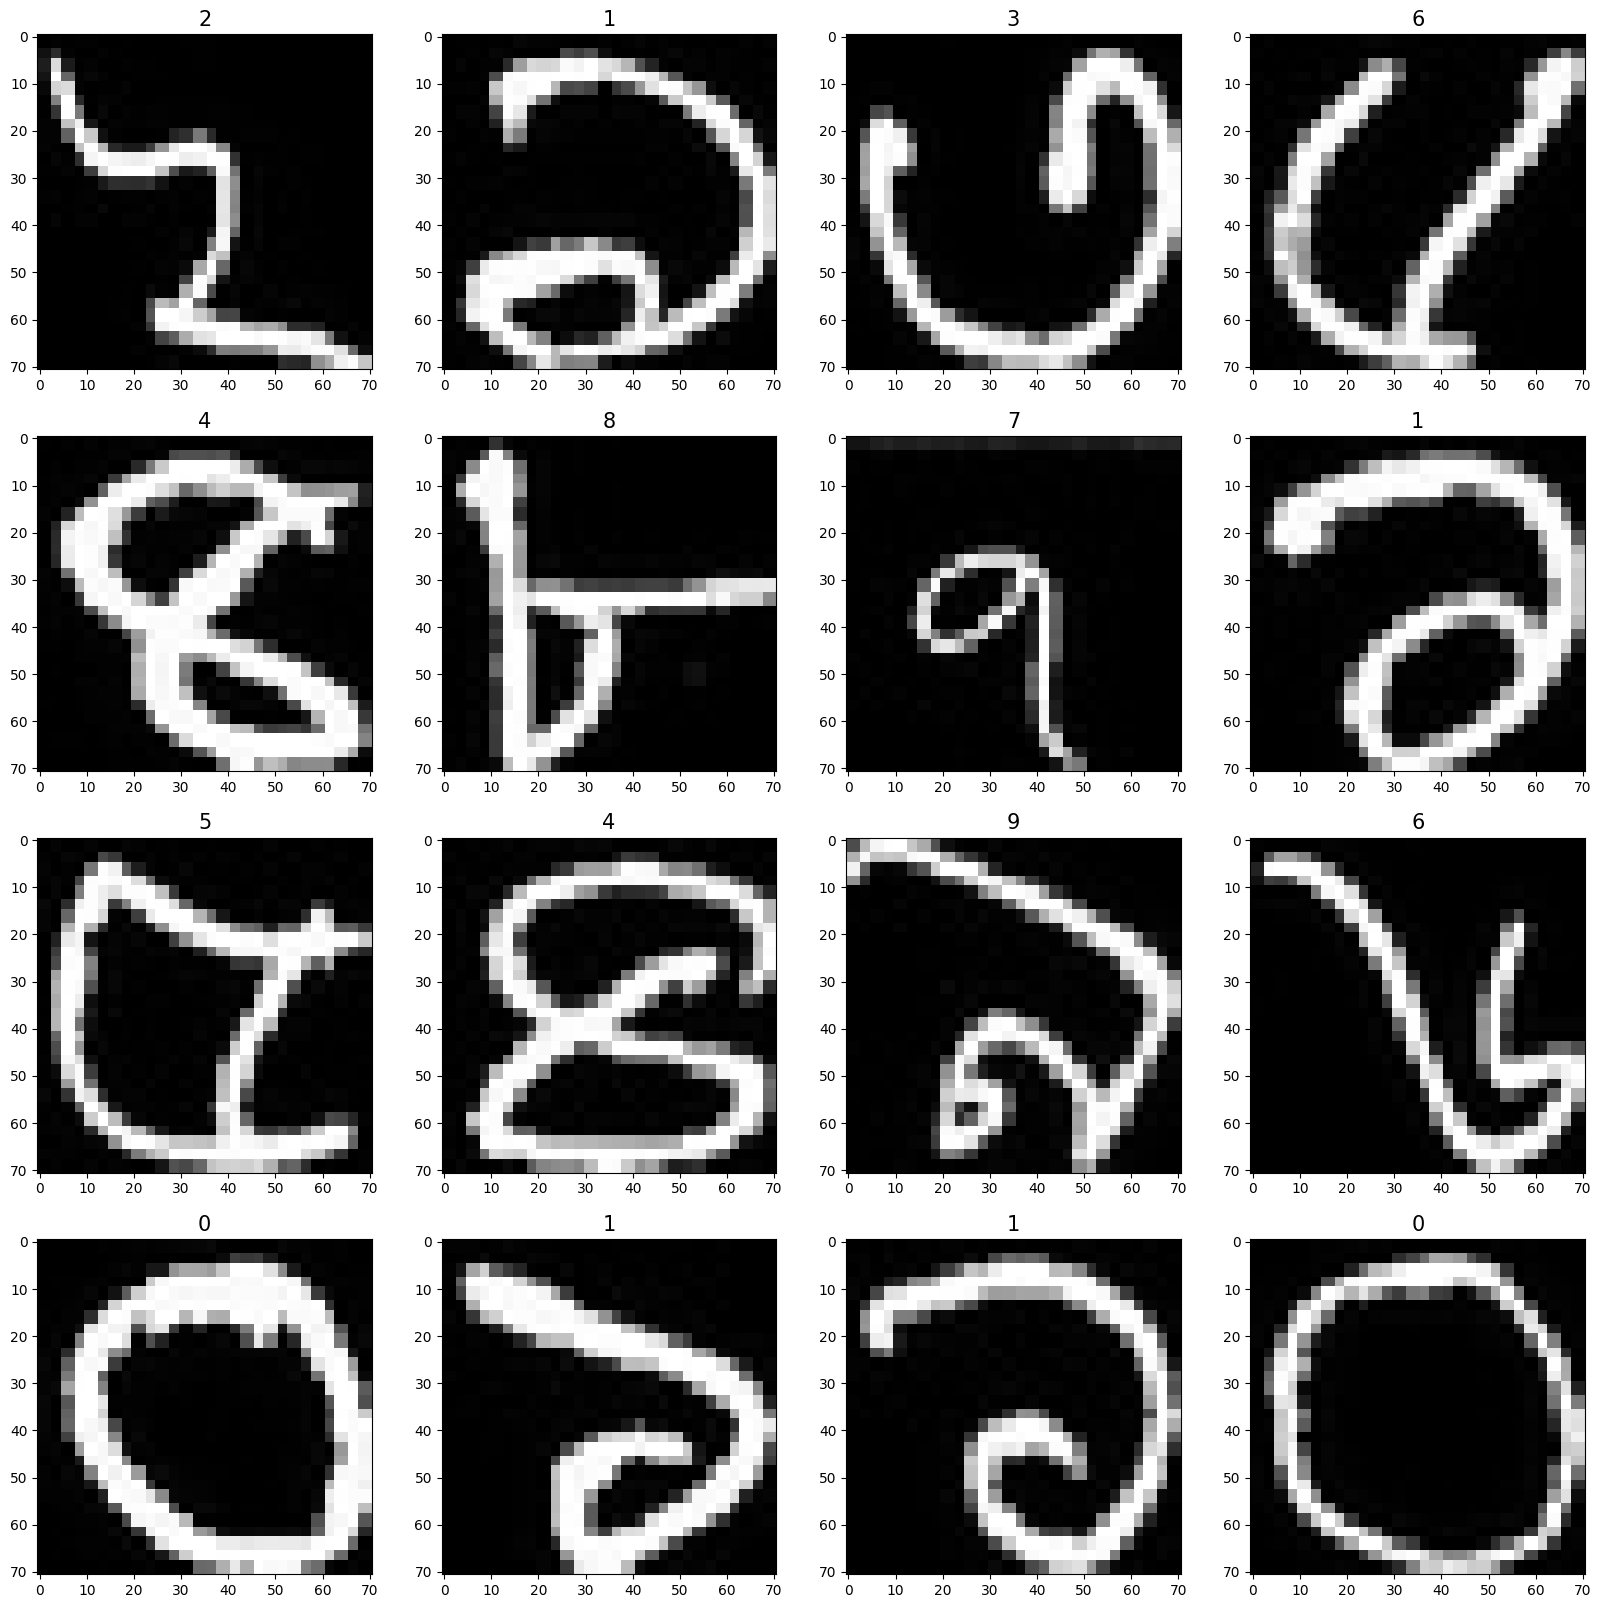

In [ ]:
class_dict = tr_gen.class_indices
classes = list(class_dict.keys())
images, labels = next(ts_gen)

plt.figure(figsize=(20, 20))

for i, (image, label) in enumerate(zip(images, labels)):
    plt.subplot(4,4, i + 1)
    plt.imshow(image)
    class_name = classes[np.argmax(label)]
    plt.title(class_name, color='k', fontsize=15)

plt.show()

#4. Building CNN Model

In [ ]:
img_shape=(71,71,3)
base_model = tf.keras.applications.Xception(include_top= False, weights= "imagenet",
                            input_shape= img_shape, pooling= 'max')


num_classes = 10

model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate=0.3),
    Dense(128, activation='relu'),
    Dropout(rate=0.25),
    Dense(num_classes, activation='softmax')
])



model.compile(Adamax(learning_rate= 0.001),
              loss= 'categorical_crossentropy',
              metrics= ['accuracy',
                        Precision(),
                        Recall()])

model.summary()

83683744/83683744 [==============================] - 5s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                         

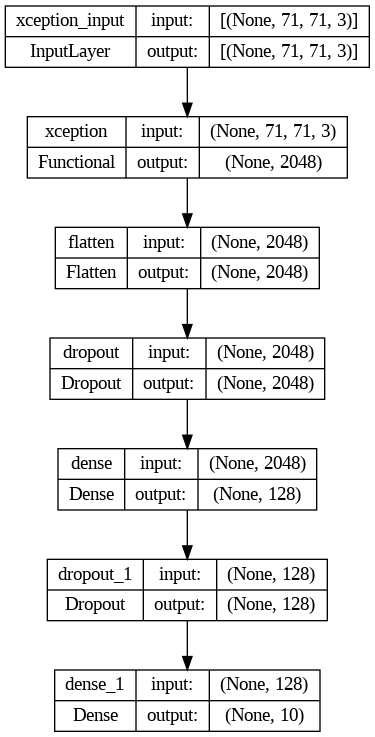

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

# 5. Training

In [ ]:
hist = model.fit(tr_gen,
                 epochs=5,
                 batch_size=32,
                 validation_data=valid_gen,
                 shuffle= False)

Epoch 1/5
768/768 [==============================] - 97s 89ms/step - loss: 0.2076 - accuracy: 0.9379 - precision: 0.9741 - recall: 0.9184 - val_loss: 0.0464 - val_accuracy: 0.9899 - val_precision: 0.9912 - val_recall: 0.9896
Epoch 2/5
768/768 [==============================] - 67s 87ms/step - loss: 0.0364 - accuracy: 0.9905 - precision: 0.9922 - recall: 0.9889 - val_loss: 0.0468 - val_accuracy: 0.9899 - val_precision: 0.9909 - val_recall: 0.9893
Epoch 3/5
768/768 [==============================] - 66s 86ms/step - loss: 0.0170 - accuracy: 0.9955 - precision: 0.9961 - recall: 0.9949 - val_loss: 0.0663 - val_accuracy: 0.9873 - val_precision: 0.9876 - val_recall: 0.9860
Epoch 4/5
768/768 [==============================] - 66s 86ms/step - loss: 0.0140 - accuracy: 0.9967 - precision: 0.9972 - recall: 0.9962 - val_loss: 0.0556 - val_accuracy: 0.9925 - val_precision: 0.9925 - val_recall: 0.9909
Epoch 5/5
768/768 [==============================] - 66s 86ms/step - loss: 0.0121 - accuracy: 0.9969

In [ ]:
#model.save('/content/drive/My Drive/xception_digit_model.h5')

In [ ]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])

# 6. Visualize model performance

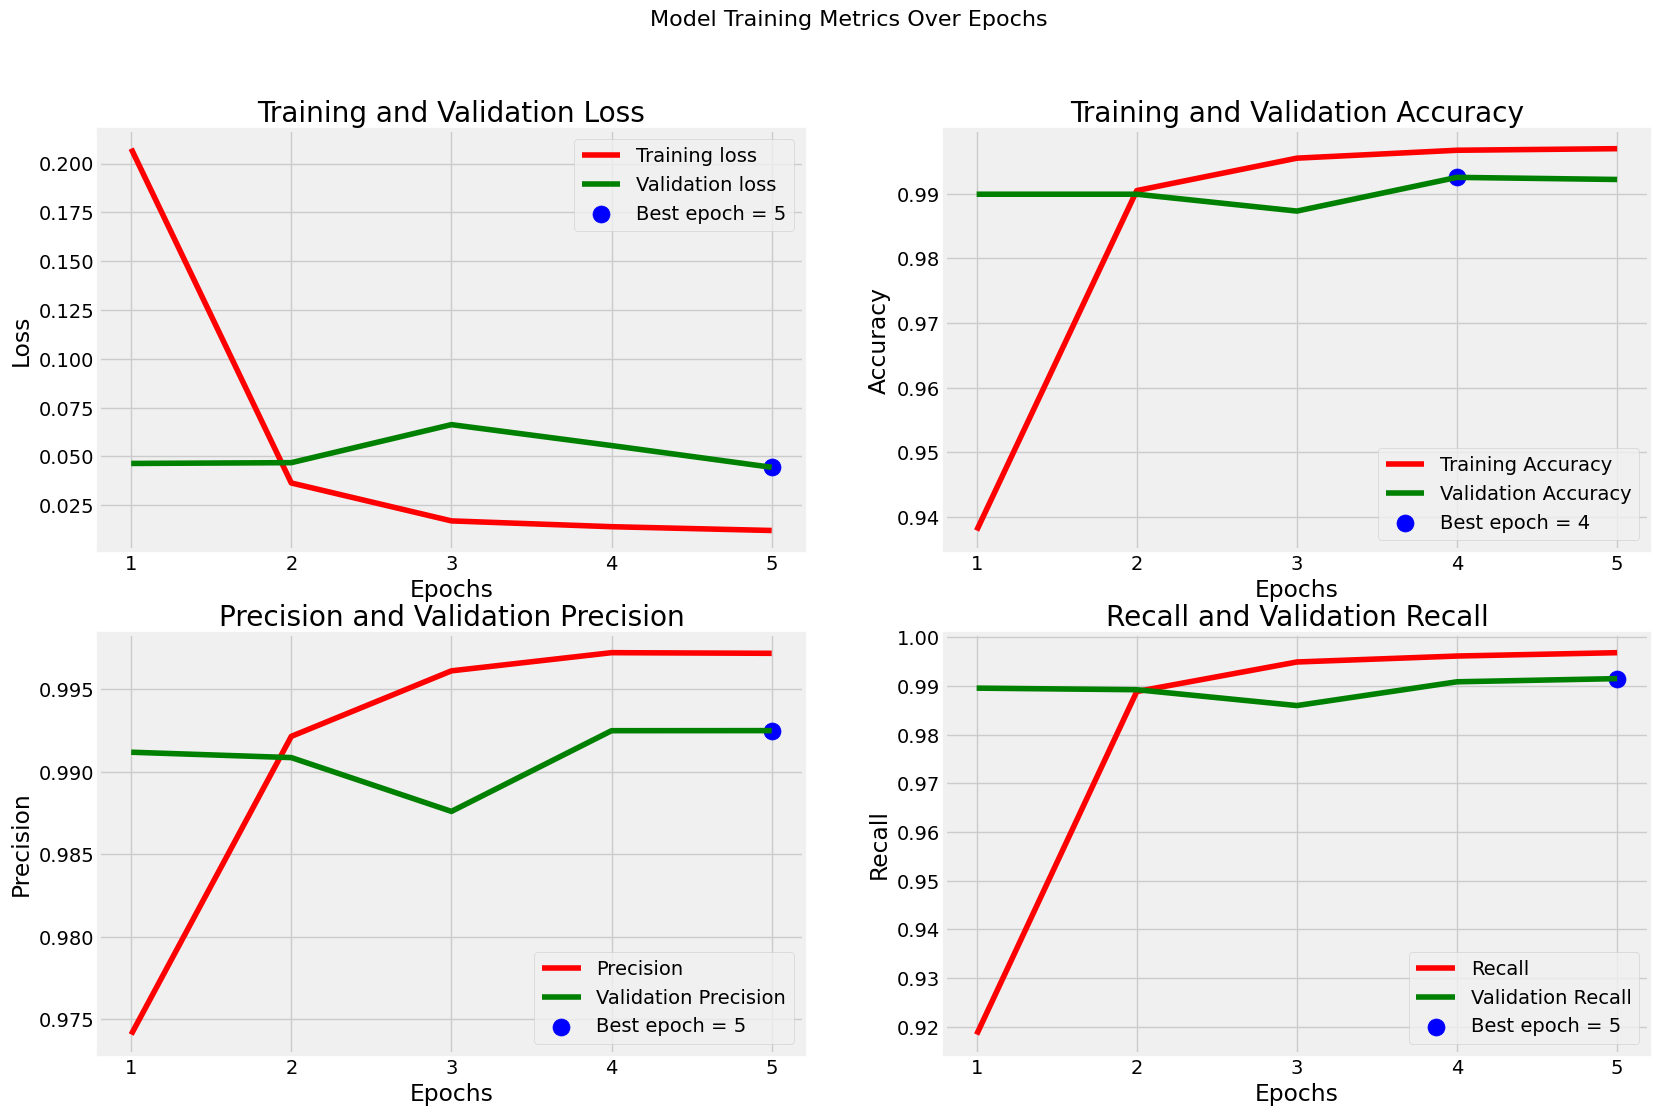

In [ ]:
tr_acc = hist.history['accuracy']
tr_loss = hist.history['loss']
tr_per = hist.history['precision']
tr_recall = hist.history['recall']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']
val_per = hist.history['val_precision']
val_recall = hist.history['val_recall']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
index_precision = np.argmax(val_per)
per_highest = val_per[index_precision]
index_recall = np.argmax(val_recall)
recall_highest = val_recall[index_recall]

Epochs = [i + 1 for i in range(len(tr_acc))]
loss_label = f'Best epoch = {str(index_loss + 1)}'
acc_label = f'Best epoch = {str(index_acc + 1)}'
per_label = f'Best epoch = {str(index_precision + 1)}'
recall_label = f'Best epoch = {str(index_recall + 1)}'

plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

plt.subplot(2, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label='Training loss')
plt.plot(Epochs, val_loss, 'g', label='Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(min(Epochs), max(Epochs)+1, 1.0))

plt.subplot(2, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(min(Epochs), max(Epochs)+1, 1.0))

plt.subplot(2, 2, 3)
plt.plot(Epochs, tr_per, 'r', label='Precision')
plt.plot(Epochs, val_per, 'g', label='Validation Precision')
plt.scatter(index_precision + 1, per_highest, s=150, c='blue', label=per_label)
plt.title('Precision and Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(min(Epochs), max(Epochs)+1, 1.0))

plt.subplot(2, 2, 4)
plt.plot(Epochs, tr_recall, 'r', label='Recall')
plt.plot(Epochs, val_recall, 'g', label='Validation Recall')
plt.scatter(index_recall + 1, recall_highest, s=150, c='blue', label=recall_label)
plt.title('Recall and Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(min(Epochs), max(Epochs)+1, 1.0))

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)

plt.show()


# 7. Testing and Evaluation

##7.1 Evaluate

In [ ]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print('-' * 20)
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print('-' * 20)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")

192/192 [==============================] - 5s 23ms/step - loss: 0.0243 - accuracy: 0.9941 - precision: 0.9951 - recall: 0.9938
Train Loss: 0.0034
Train Accuracy: 99.89%
--------------------
Validation Loss: 0.0440
Validation Accuracy: 99.19%
--------------------
Test Loss: 0.0243
Test Accuracy: 99.41%


In [ ]:
from keras.models import load_model
saved_model = load_model('/content/drive/MyDrive/xception_digit_model.h5')

In [ ]:
preds = saved_model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

192/192 [==============================] - 9s 27ms/step


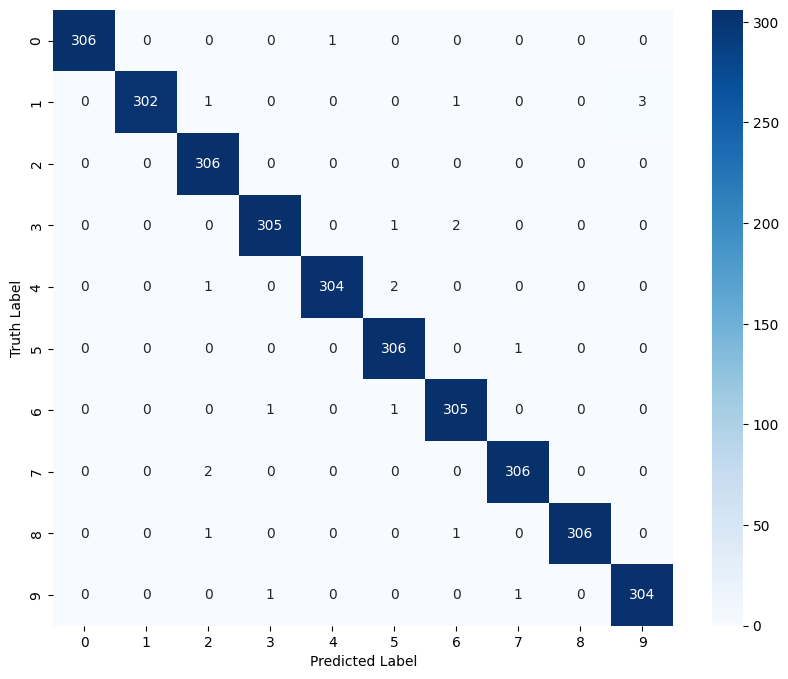

In [ ]:
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()

In [ ]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      0.98      0.99       307
           2       0.98      1.00      0.99       306
           3       0.99      0.99      0.99       308
           4       1.00      0.99      0.99       307
           5       0.99      1.00      0.99       307
           6       0.99      0.99      0.99       307
           7       0.99      0.99      0.99       308
           8       1.00      0.99      1.00       308
           9       0.99      0.99      0.99       306

    accuracy                           0.99      3071
   macro avg       0.99      0.99      0.99      3071
weighted avg       0.99      0.99      0.99      3071



In [ ]:
preds = saved_model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

# Generate the classification report as a dictionary
clr = classification_report(ts_gen.classes, y_pred, output_dict=True)

# Extract the overall precision, recall, and F1-score from the weighted average
overall_precision = clr['weighted avg']['precision']
overall_recall = clr['weighted avg']['recall']
overall_f1_score = clr['weighted avg']['f1-score']

print(f"Overall Precision: {overall_precision:.2f}")
print(f"Overall Recall: {overall_recall:.2f}")
print(f"Overall F1-Score: {overall_f1_score:.2f}")


192/192 [==============================] - 4s 21ms/step
Overall Precision: 0.99
Overall Recall: 0.99
Overall F1-Score: 0.99


##7.2 Testing

In [ ]:
def predict(img_path):
    import numpy as np
    import matplotlib.pyplot as plt
    from PIL import Image
    label = list(class_dict.keys())
    plt.figure(figsize=(12, 12))
    img = Image.open(img_path)
    img = img.convert("RGB")
    resized_img = img.resize((71, 71))
    img_array = np.asarray(resized_img)
    img_array = img_array / 255
    img_array = np.expand_dims(img_array, axis=0)
    predictions = model.predict(img_array)
    probs = list(predictions[0])
    labels = label

    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)

    plt.subplot(2, 1, 2)
    bars = plt.barh(labels, probs)
    plt.xlabel('Probability', fontsize=15)
    ax = plt.gca()
    ax.bar_label(bars, fmt='%.2f')

    plt.show()

1/1 [==============================] - 1s 1s/step


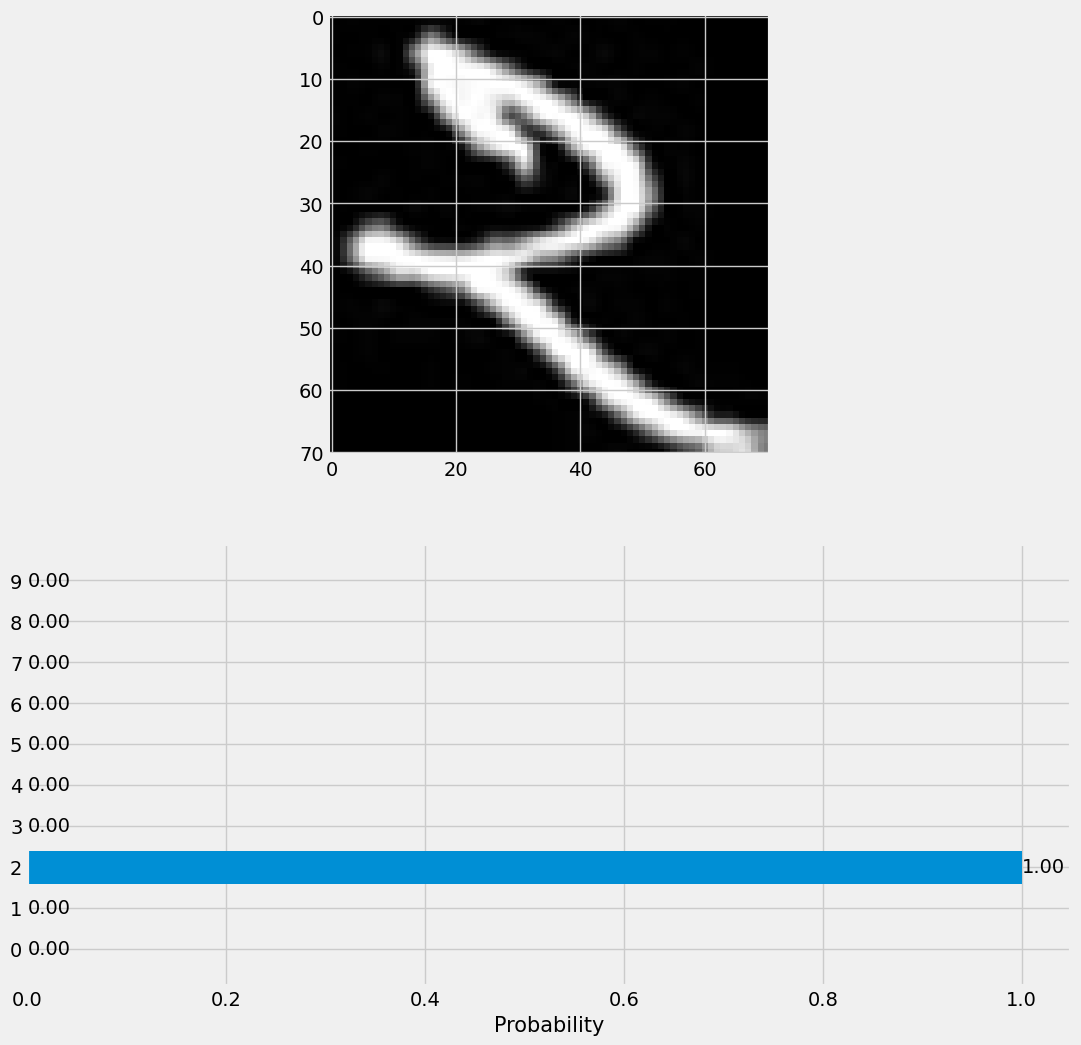

In [ ]:
img_path= '/content/split_dataset/val/2/0_B.BARIA_17_2_363.jpg'
predict(img_path)

1/1 [==============================] - 0s 25ms/step


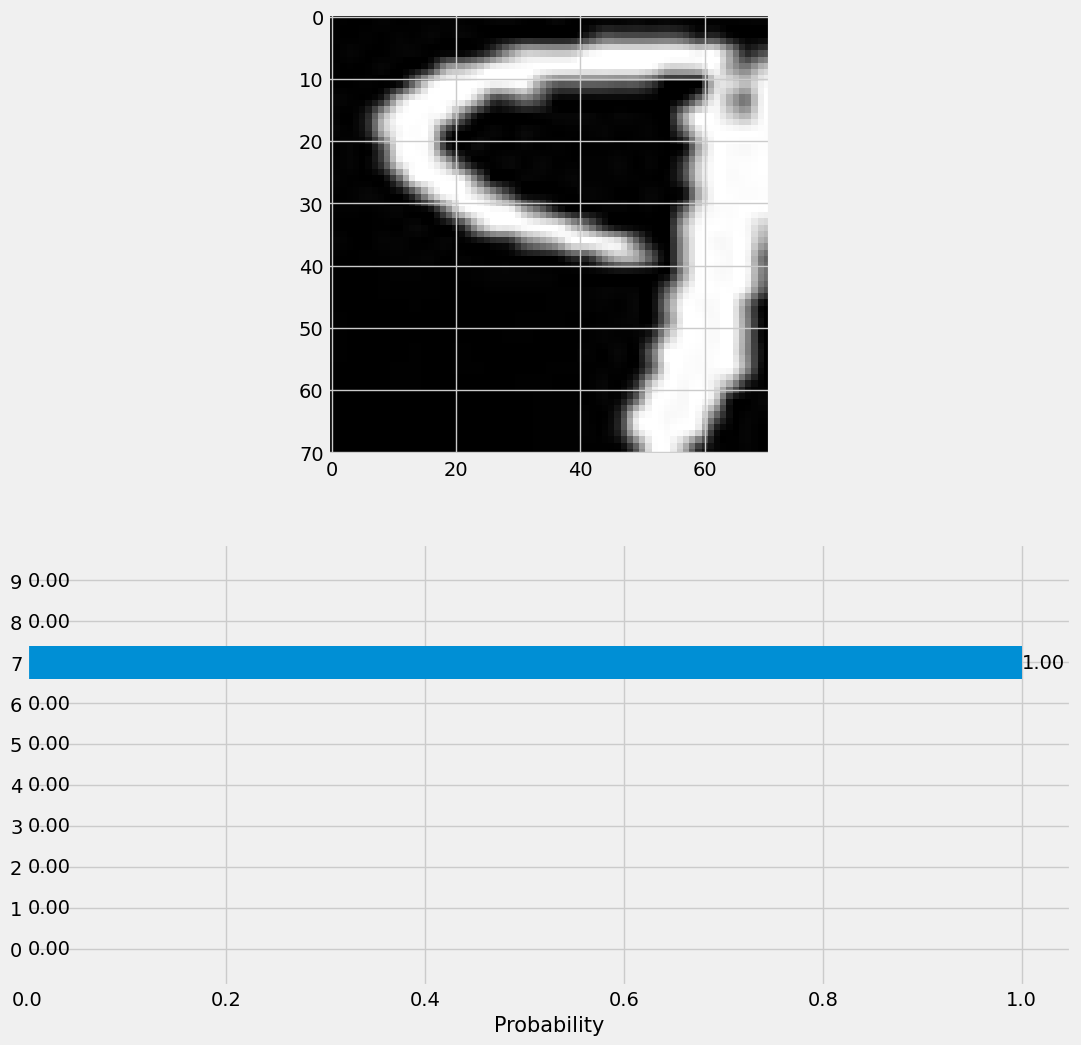

In [ ]:
img_path= '/content/split_dataset/val/7/0_BIK_13_1_450.jpg'
predict(img_path)

In [ ]:
train_score = saved_model.evaluate(tr_gen, verbose=1)
valid_score = saved_model.evaluate(valid_gen, verbose=1)
test_score = saved_model.evaluate(ts_gen, verbose=1)

print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print('-' * 20)
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print('-' * 20)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")

192/192 [==============================] - 3s 15ms/step - loss: 0.0217 - accuracy: 0.9958 - precision: 0.9961 - recall: 0.9958
Train Loss: 0.0006
Train Accuracy: 99.98%
--------------------
Validation Loss: 0.0380
Validation Accuracy: 99.25%
--------------------
Test Loss: 0.0217
Test Accuracy: 99.58%


# Previous saved model

In [ ]:
from keras.models import load_model
saved_model2 = load_model('/content/drive/MyDrive/digit_model.h5')
# with image 299*299 3 shape

In [ ]:
def predict_from_save_model(img_path):
    import numpy as np
    import matplotlib.pyplot as plt
    from PIL import Image
    label = list(class_dict.keys())
    plt.figure(figsize=(12, 12))
    img = Image.open(img_path)
    img = img.convert("RGB")
    resized_img = img.resize((299, 299))
    img_array = np.asarray(resized_img)
    img_array = img_array / 255
    img_array = np.expand_dims(img_array, axis=0)
    predictions = saved_model.predict(img_array)
    probs = list(predictions[0])
    labels = label

    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)

    plt.subplot(2, 1, 2)
    bars = plt.barh(labels, probs)
    plt.xlabel('Probability', fontsize=15)
    ax = plt.gca()
    ax.bar_label(bars, fmt='%.2f')

    plt.show()

In [ ]:
img_path= '/content/split_dataset/val/2/0_B.BARIA_17_2_363.jpg'
predict_from_save_model(img_path)

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 71, 71, 3), found shape=(None, 299, 299, 3)


<Figure size 1200x1200 with 0 Axes>

# Augmented Model

In [ ]:
from keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(
    rescale=1/255,
    brightness_range=(0.8, 1.2),
    rotation_range=10,
    zoom_range=0.05,
    horizontal_flip=True,
)

augmented_tr_gen = datagen.flow_from_dataframe(
    tr_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=img_size
)


In [ ]:
class_dict = augmented_tr_gen.class_indices
classes = list(class_dict.keys())
images, labels = next(augmented_tr_gen)

plt.figure(figsize=(20, 20))

for i, (image, label) in enumerate(zip(images, labels)):
    plt.subplot(4,4, i + 1)
    plt.imshow(image)
    class_name = classes[np.argmax(label)]
    plt.title(class_name, color='k', fontsize=15)

plt.show()

In [ ]:
img_shape=(71,71,3)
base_model = tf.keras.applications.Xception(include_top= False, weights= "imagenet",
                            input_shape= img_shape, pooling= 'max')


num_classes = 10

aug_model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate=0.3),
    Dense(128, activation='relu'),
    Dropout(rate=0.25),
    Dense(num_classes, activation='softmax')
])



aug_model.compile(Adamax(learning_rate= 0.001),
              loss= 'categorical_crossentropy',
              metrics= ['accuracy',
                        Precision(),
                        Recall()])

# model.summary()

In [ ]:
hist = aug_model.fit(augmented_tr_gen,
                 epochs=5,
                 batch_size=32,
                 validation_data=valid_gen,
                 shuffle= False)

In [ ]:
train_score = aug_model.evaluate(augmented_tr_gen, verbose=1)
valid_score = aug_model.evaluate(valid_gen, verbose=1)
test_score = aug_model.evaluate(ts_gen, verbose=1)

print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print('-' * 20)
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print('-' * 20)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")